# Housing Price Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


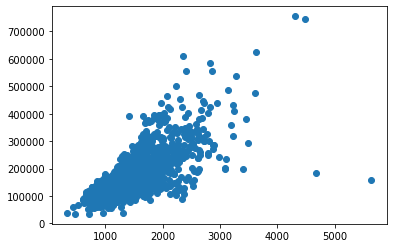

In [7]:
plt.scatter(train.GrLivArea,train.SalePrice)

In [8]:
train.drop(train[(train.GrLivArea>4000)&(train.SalePrice<300000)].index,axis=0,inplace=True)

In [9]:
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [10]:
ntrain=len(train)
ntest=len(test)

In [11]:
y_train = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

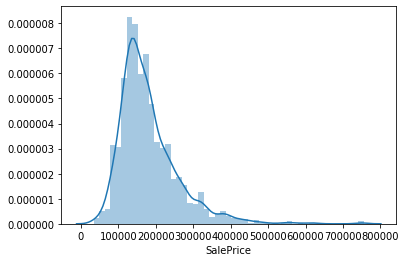

In [12]:
sns.distplot(y_train)

In [13]:
all_data = pd.concat([train, test])

In [14]:
all_data.shape

(2917, 79)

In [15]:
train.shape

(1458, 79)

In [16]:
test.shape

(1459, 79)

### Missing Data

In [17]:
all_data_na = (all_data.isna().sum())/len(all_data) *100
all_data_na.drop(all_data_na[all_data_na==0].index,inplace=True)
all_data_na.sort_values(ascending=False, inplace=True)
missing_data = pd.DataFrame(all_data_na,columns = ['Percent Missing'])

In [18]:
missing_data.iloc[18:35,:]

,Percent Missing
MSZoning,0.137127
BsmtFullBath,0.068564
BsmtHalfBath,0.068564
Utilities,0.068564
Functional,0.068564
Exterior2nd,0.034282
Exterior1st,0.034282
SaleType,0.034282
BsmtFinSF1,0.034282
BsmtFinSF2,0.034282


**PoolQC**

The feature 'PoolQC' only applies to houses that have pools, which are few in number. Thus the majority of houses have a null value for this feature. We will replace these missing values with 'None' to indicate as such.

In [19]:
all_data.PoolQC.value_counts()

Ex    4
Gd    3
Fa    2
Name: PoolQC, dtype: int64

In [20]:
all_data.PoolQC.fillna('None',inplace=True)

**MiscFeature**

The feature 'MiscFeature' only applies to houses that have some feature not covered by the other variables, which are also few in number. Thus the majority of houses have a null value for this feature, although many do have sheds indicated in the values for this feature. We will replace these missing values with 'None' to indicate as such.

In [21]:
all_data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [22]:
all_data.MiscFeature.fillna('None',inplace=True)

**Alley**

The feature 'Alley' only applies to houses that have alley access. The majority of houses do not have alley access, and thus have a null value for this feature. We will replace these missing values with 'None' to indicate as such.

In [23]:
all_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [24]:
all_data.Alley.fillna('None',inplace=True)

**Fence**

Null values for the feature 'Fence' indicate that the house does not have a fence. We will replace these missing values with 'None' to indicate as such.

In [25]:
all_data.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [26]:
all_data.Fence.fillna('None',inplace=True)

**Fireplace Quality**

Null values for the feature 'FireplaceQu' indicate that the house does not have a fireplace. We will replace these missing values with 'None' to indicate as such.

In [27]:
all_data.FireplaceQu.value_counts()

Gd    742
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [28]:
all_data.FireplaceQu.fillna('None',inplace=True)

**Lot Frontage**

In [29]:
all_data.LotFrontage.value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
182.0      1
119.0      1
195.0      1
153.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [29]:
all_data.LotFrontage = all_data.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.median()))

**Garage Features**

For the following features, a null value indicates the absence of a garage. Thus, for all five features, we will fill the null values with 'None' to indicate as such.

In [30]:
garagefeatures = ['GarageFinish','GarageYrBlt','GarageQual','GarageCond','GarageType']
for feature in garagefeatures:
    all_data[feature].fillna('None',inplace=True)

For the following garage featues, a null value also indicates the absence of a garage. However, as these are numerical features, we will fill the null values with the float value 0.0 to indicate as such. 

In [31]:
numgaragefeatures=['GarageCars','GarageArea']
for feature in numgaragefeatures:
    all_data[feature].fillna(0.0,inplace=True)

**Basement Features**

As with the above garage features, the following basement features with a null value indicate the absence of a basement. Thus, for all five features, we will fill the null values with 'None' to indicate as such.

In [32]:
basementfeatures=['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
for feature in basementfeatures:
    all_data[feature].fillna('None',inplace=True)

For the following basement featues, a null value also indicates the absence of a basement. However, as these are numerical features, we will fill the null values with the float value 0.0 to indicate as such. 

In [33]:
numbasementfeatures=['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for feature in numbasementfeatures:
    all_data[feature].fillna(0.0,inplace=True)

**Veneer Type**

For the features 'MasVnrType', a null value indicates the absence of veneer. Thus, we will fill the null values with 'None' to indicate as such. For the features 'MasVnrArea', a null value also indicates the absence of veneer. However, as this is a numerical feature, we will fill the null values with the float value 0.0 to indicate as such. 

In [34]:
all_data.MasVnrType.fillna('None',inplace=True)
all_data.MasVnrArea.fillna(0.0,inplace=True)

**Remaining Features**

For the remaining features (MSZoning, Utilities, Functional, Exterior1st, Exterior2nd, SaleType, Electrical, and KitchenQual), very few entries contain missing values (<0.2% of the values for each feature). Thus, the most appropriate strategy to deal with these null values will be to fill them with the most common value for each feature.

**MSZoning**

In [36]:
all_data.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [54]:
all_data.MSZoning.fillna('RL',inplace=True)

**Utilities**

In [57]:
all_data.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [59]:
all_data.Utilities.fillna('AllPub',inplace=True)

**Functional**

In [60]:
all_data.Functional.value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [62]:
all_data.Functional.fillna('Typ',inplace=True)

**Exterior Features**

In [64]:
all_data.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [65]:
all_data.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [76]:
all_data.Exterior1st.fillna('VinylSd',inplace=True)
all_data.Exterior2nd.fillna('VinylSd',inplace=True)

**Sale Type**

In [77]:
all_data.SaleType.value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [78]:
all_data.SaleType.fillna('WD',inplace=True)

**Electrical**

In [80]:
all_data.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [81]:
all_data.Electrical.fillna('SBrkr',inplace=True)

**Kitchen Quality**

In [82]:
all_data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [83]:
all_data.KitchenQual.fillna('TA',inplace=True)

In [84]:
fin_all_data_na = (all_data.isna().sum())/len(all_data) *100
fin_all_data_na.drop(fin_all_data_na[fin_all_data_na==0].index,inplace=True)
fin_all_data_na.sort_values(ascending=False, inplace=True)
fin_missing_data = pd.DataFrame(fin_all_data_na,columns = ['Percent Missing'])
fin_missing_data

,Percent Missing


### More Feature Engineering

In [86]:
# convert to categorical

to_cat = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
for feature in to_cat:
    all_data[feature] = all_data[feature].astype(str)

In [87]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2917 non-null object
MSZoning         2917 non-null object
LotFrontage      2917 non-null float64
LotArea          2917 non-null int64
Street           2917 non-null object
Alley            2917 non-null object
LotShape         2917 non-null object
LandContour      2917 non-null object
Utilities        2917 non-null object
LotConfig        2917 non-null object
LandSlope        2917 non-null object
Neighborhood     2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
BldgType         2917 non-null object
HouseStyle       2917 non-null object
OverallQual      2917 non-null object
OverallCond      2917 non-null object
YearBuilt        2917 non-null object
YearRemodAdd     2917 non-null object
RoofStyle        2917 non-null object
RoofMatl         2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      29

In [88]:
from sklearn.preprocessing import LabelEncoder
to_encode = ['MSSubClass','LotShape','LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','GarageCond',
             'PavedDrive','PoolQC','Fence']
for feature in to_encode:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[feature].values)) 
    all_data[feature] = lbl.transform(list(all_data[feature].values))

## Exploring the Data

In [92]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [93]:
exp_data = train.copy()

In [94]:
exp_data['SalePrice'] = y_train

In [95]:
exp_data['TotalSF'] = exp_data['1stFlrSF'] + exp_data['2ndFlrSF'] + exp_data['TotalBsmtSF']

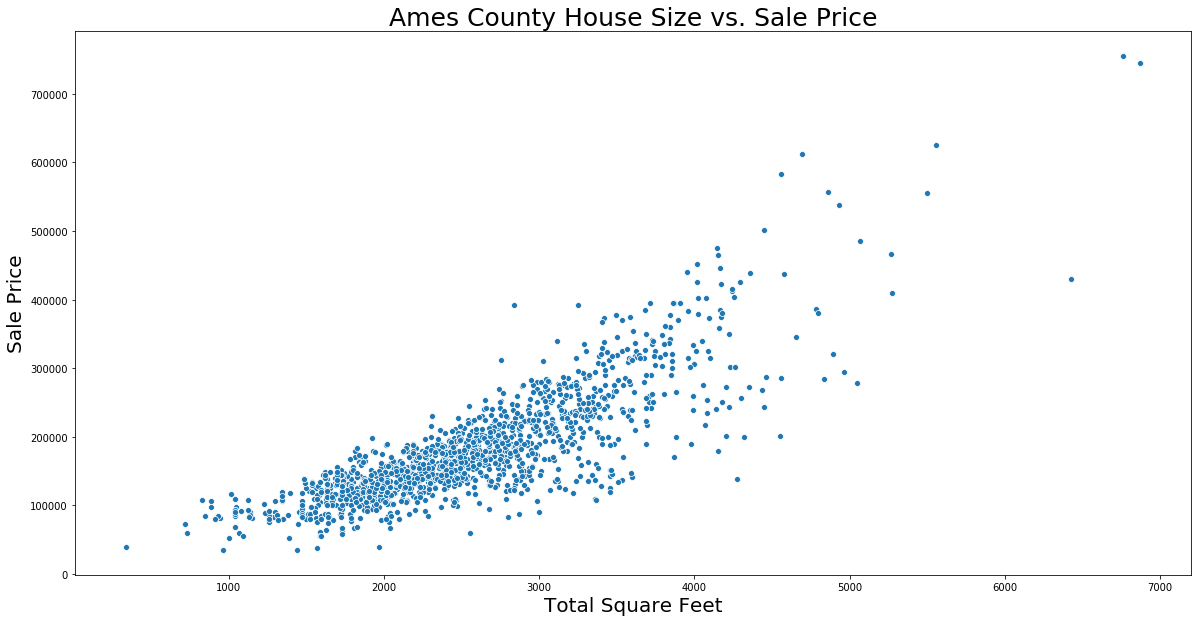

In [103]:
plt.figure(figsize=(20,10))
sns.scatterplot(exp_data['TotalSF'],exp_data['SalePrice'])
plt.title('Ames County House Size vs. Sale Price',fontsize=25)
plt.xlabel('Total Square Feet',fontsize=20)
plt.ylabel('Sale Price',fontsize=20)
plt.show()

## Modeling the Data

### Final Preprocessing